In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# read csv
data = pd.read_csv("b76-joined.csv")
# convert dates
data["Hour"] = data["Hour"].astype("str")
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Hour"] + ":00:00")
del data["Hour"]
del data["Date"]
# set datetime index
data.index = pd.DatetimeIndex(data.DateTime)
# fix no2 col
data = data[data['NO2-ug-per-m3'].apply(lambda x: x.isnumeric())]
data["NO2"] = data["NO2-ug-per-m3"].astype("int")
del data["NO2-ug-per-m3"]
# fix temp col
data = data[data["air_temp_deg_c"] > -500]
data.head()

,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,wind_meters_per_second,rain_millimeters,did_it_rain,air_temp_deg_c,relative_humidity_percent,e5,e10,diesel,DateTime,NO2
DateTime,,,,,,,,,,,,,,
2019-01-02 04:00:00,11,8,19,3,7.5,0.0,0,3.5,67.0,1.399000,1.379000,1.289000,2019-01-02 04:00:00,11
2019-01-02 05:00:00,30,40,70,3,6.6,0.0,0,3.8,62.0,1.404529,1.379118,1.265706,2019-01-02 05:00:00,25
2019-01-02 06:00:00,137,76,213,3,9.1,0.0,0,3.9,57.0,1.394352,1.372944,1.248014,2019-01-02 06:00:00,65
2019-01-02 07:00:00,266,198,464,3,9.8,0.0,0,3.9,52.0,1.383038,1.355538,1.234577,2019-01-02 07:00:00,71
2019-01-02 08:00:00,394,252,646,3,9.9,0.0,0,3.7,54.0,1.373588,1.347706,1.228059,2019-01-02 08:00:00,70


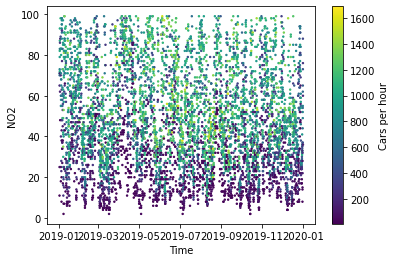

'(Color: cars total) NO2 correlates with cars'

In [133]:
plt.figure()
plt.scatter(data["DateTime"], data["NO2"], s=2, c=data["Cars-Total"])
plt.xlabel("Time")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Cars per hour")
plt.show()
display("(Color: cars total) NO2 correlates with cars")

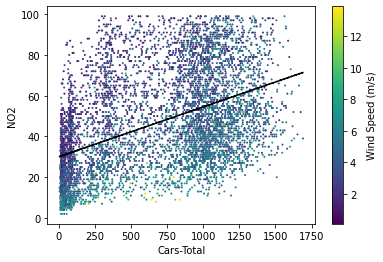

'Color: Wind speed (Strong wind -> Less NO2 measured)'

In [132]:
plt.figure()
plt.scatter(data["Cars-Total"], data["NO2"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Cars-Total"], data["NO2"], 1)
plt.plot(data["Cars-Total"], m*data["Cars-Total"]+c, c="black", linestyle="dashed")
plt.xlabel("Cars-Total")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()
display("Color: Wind speed (Strong wind -> Less NO2 measured)")

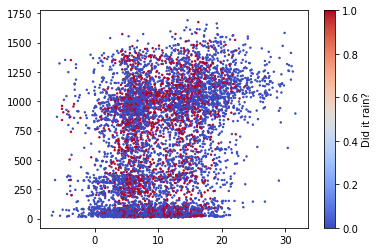

'(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature'

In [131]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["Cars-Total"], s=2, c=data["did_it_rain"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Did it rain?")
plt.show()
display("(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature")

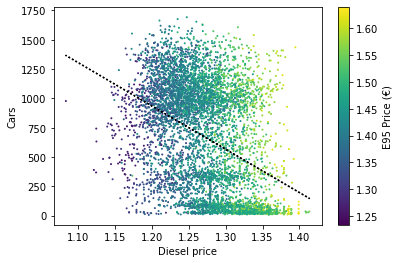

'(Color: gas price) Cheaper diesel fuel means more traffic'

In [134]:
plt.figure()
plt.scatter(data["diesel"], data["Cars-Total"], s=1, c=data["e5"])
m,c = np.polyfit(data["diesel"], data["Cars-Total"], 1)
plt.plot(data["diesel"], m*data["diesel"]+c, c="black", linestyle="dotted")
plt.xlabel("Diesel price")
plt.ylabel("Cars")
cb = plt.colorbar()
cb.set_label("E95 Price (€)")
plt.show()
display("(Color: gas price) Cheaper diesel fuel means more traffic")

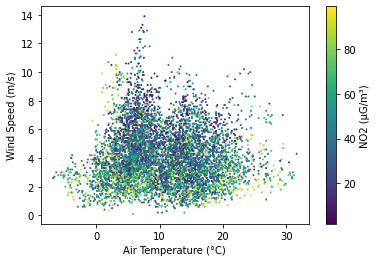

In [128]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["wind_meters_per_second"], s=1, c=data["NO2"])
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
cb = plt.colorbar()
cb.set_label("NO2 (µG/m³)")
plt.show()